In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import geopandas as gpd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [ ]:
state_df = pd.read_csv('/content/StatewiseTestingDetails.csv')
country_df = pd.read_csv('/content/covid_19_india.csv')

In [ ]:
state_df.head()


,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [ ]:
country_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
state_df[state_df['State']=='Tamil Nadu'].head()


,Date,State,TotalSamples,Negative,Positive
13505,2020-04-03,Tamil Nadu,3684.0,2789,411.0
13506,2020-04-08,Tamil Nadu,5305.0,4414,690.0
13507,2020-04-09,Tamil Nadu,7267.0,5824,834.0
13508,2020-04-10,Tamil Nadu,8410.0,6838,911.0
13509,2020-04-11,Tamil Nadu,9842.0,7779,969.0


In [ ]:
country_df[((country_df['Date']=='2020-03-30')&(country_df['State/UnionTerritory']=='Tamil Nadu'))]


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
495,496,2020-03-30,9:30 PM,Tamil Nadu,-,-,4,1,67


In [ ]:
df=country_df.copy()

In [ ]:
def drop_star(df):
    for i in df['State/UnionTerritory'].items():
        if i[1][-3:] == "***":
            df.drop(i[0],inplace=True)

drop_star(df)
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli',
       'Himanchal Pradesh', 'Karanataka'], dtype=object)

In [ ]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [ ]:
df.drop(['Time'],axis=1, inplace=True)

In [ ]:
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [ ]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df['Discharge_Rate'] = np.round((df['Cured']/df['Confirmed'])*100, decimals = 4)

In [ ]:
df['Death_Rate'] = np.round((df['Deaths']/df['Confirmed'])*100, decimals = 4)
df.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
0,1,2020-01-30,Kerala,1,0,0,0,1,1,0.0,0.0
1,2,2020-01-31,Kerala,1,0,0,0,1,1,0.0,0.0
2,3,2020-02-01,Kerala,2,0,0,0,2,2,0.0,0.0
3,4,2020-02-02,Kerala,3,0,0,0,3,3,0.0,0.0
4,5,2020-02-03,Kerala,3,0,0,0,3,3,0.0,0.0


In [ ]:
df[df['States']=='Tamil Nadu'].tail()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
17960,17961,2021-08-07,Tamil Nadu,-,-,2516938,34260,2571383,20185,97.8827,1.3324
17996,17997,2021-08-08,Tamil Nadu,-,-,2518777,34289,2573352,20286,97.8792,1.3325
18032,18033,2021-08-09,Tamil Nadu,-,-,2520584,34317,2575308,20407,97.8751,1.3325
18068,18069,2021-08-10,Tamil Nadu,-,-,2522470,34340,2577237,20427,97.8750,1.3324
18104,18105,2021-08-11,Tamil Nadu,-,-,2524400,34367,2579130,20363,97.8780,1.3325


In [ ]:
df[df['States']=='Maharashtra'].tail()


,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
17950,17951,2021-08-07,Maharashtra,-,-,6130137,133717,6341759,77905,96.6630,2.1085
17986,17987,2021-08-08,Maharashtra,-,-,6139493,133845,6347820,74482,96.7181,2.1085
18022,18023,2021-08-09,Maharashtra,-,-,6144388,133996,6353328,74944,96.7113,2.1091
18058,18059,2021-08-10,Maharashtra,-,-,6151956,134064,6357833,71813,96.7618,2.1086
18094,18095,2021-08-11,Maharashtra,-,-,6159676,134201,6363442,69565,96.7979,2.1089


In [ ]:
df[df['States']=='West Bengal'].tail()


,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
17965,17966,2021-08-07,West Bengal,-,-,1503535,18202,1532379,10642,98.1177,1.1878
18001,18002,2021-08-08,West Bengal,-,-,1504326,18217,1533128,10585,98.1214,1.1882
18037,18038,2021-08-09,West Bengal,-,-,1505089,18229,1533803,10485,98.1279,1.1885
18073,18074,2021-08-10,West Bengal,-,-,1505808,18240,1534360,10312,98.1392,1.1888
18109,18110,2021-08-11,West Bengal,-,-,1506532,18252,1534999,10215,98.1455,1.1891


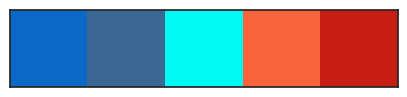

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

In [ ]:
current = df[df.Date == '2021-07-06']

In [ ]:
max_confirmed_cases = current.sort_values(by='Confirmed', ascending = False)
max_confirmed_cases.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
16798,16799,2021-07-06,Maharashtra,-,-,5861720,123136,6104917,120061,96.0164,2.0170
16794,16795,2021-07-06,Kerala,-,-,2866806,13818,2981721,101097,96.1460,0.4634
16793,16794,2021-07-06,Karnataka,-,-,2779038,35434,2856491,42019,97.2885,1.2405
16808,16809,2021-07-06,Tamil Nadu,-,-,2432017,33059,2500002,34926,97.2806,1.3224
16779,16780,2021-07-06,Andhra Pradesh,-,-,1858189,12870,1905023,33964,97.5416,0.6756


In [ ]:
top_cases = max_confirmed_cases[:10]
top_cases.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
16798,16799,2021-07-06,Maharashtra,-,-,5861720,123136,6104917,120061,96.0164,2.0170
16794,16795,2021-07-06,Kerala,-,-,2866806,13818,2981721,101097,96.1460,0.4634
16793,16794,2021-07-06,Karnataka,-,-,2779038,35434,2856491,42019,97.2885,1.2405
16808,16809,2021-07-06,Tamil Nadu,-,-,2432017,33059,2500002,34926,97.2806,1.3224
16779,16780,2021-07-06,Andhra Pradesh,-,-,1858189,12870,1905023,33964,97.5416,0.6756


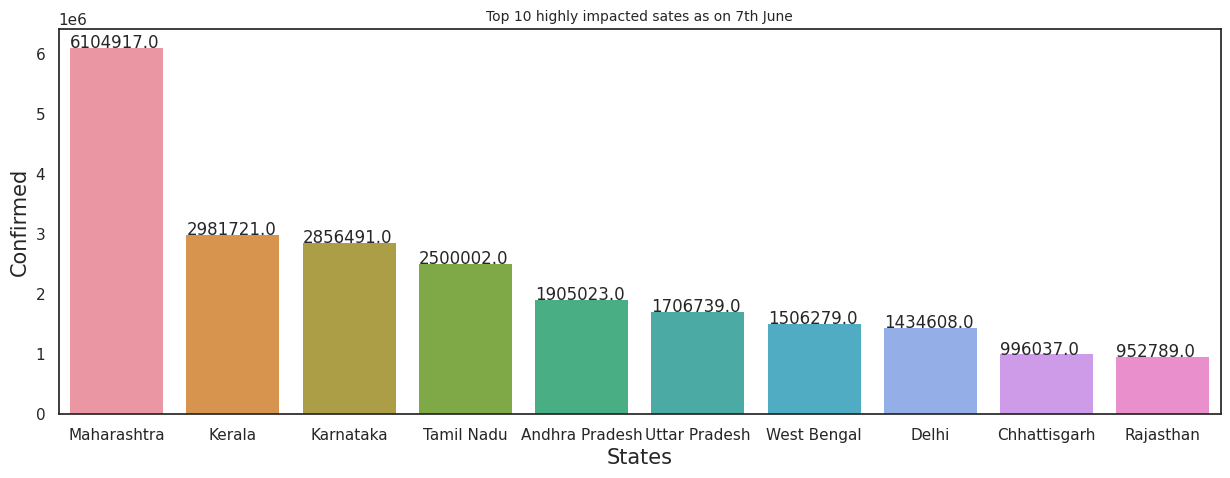

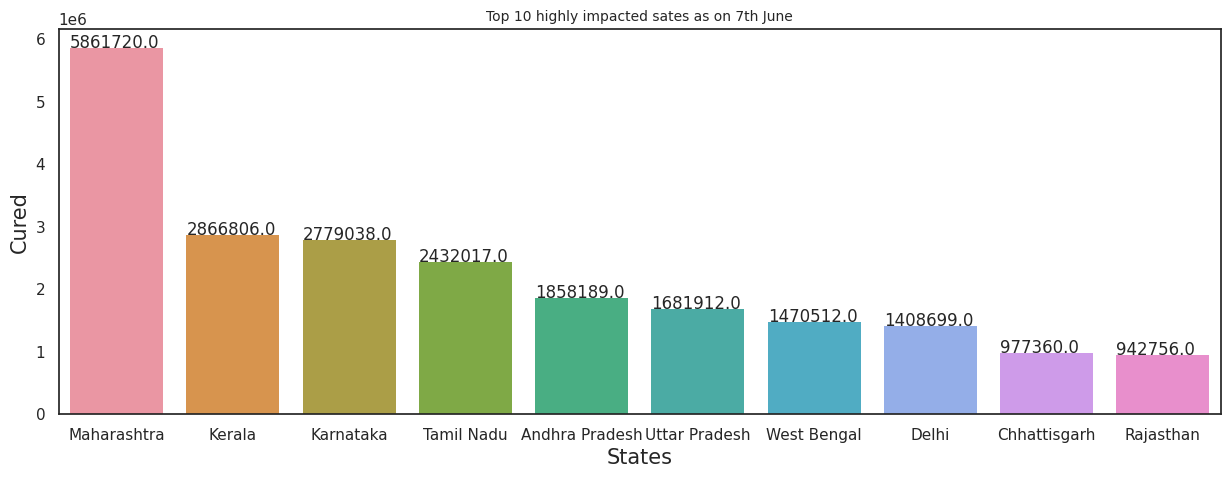

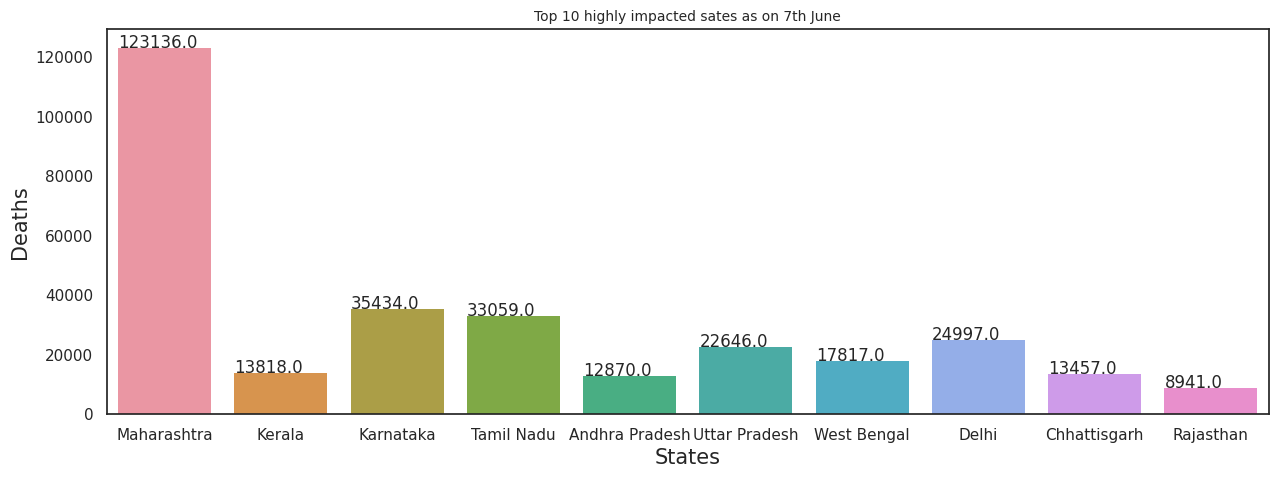

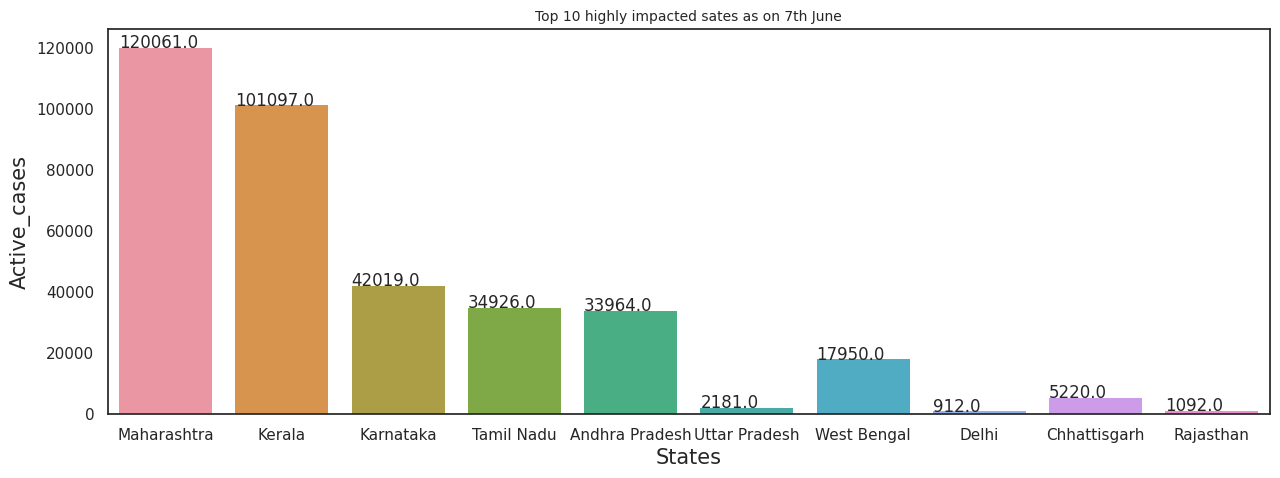

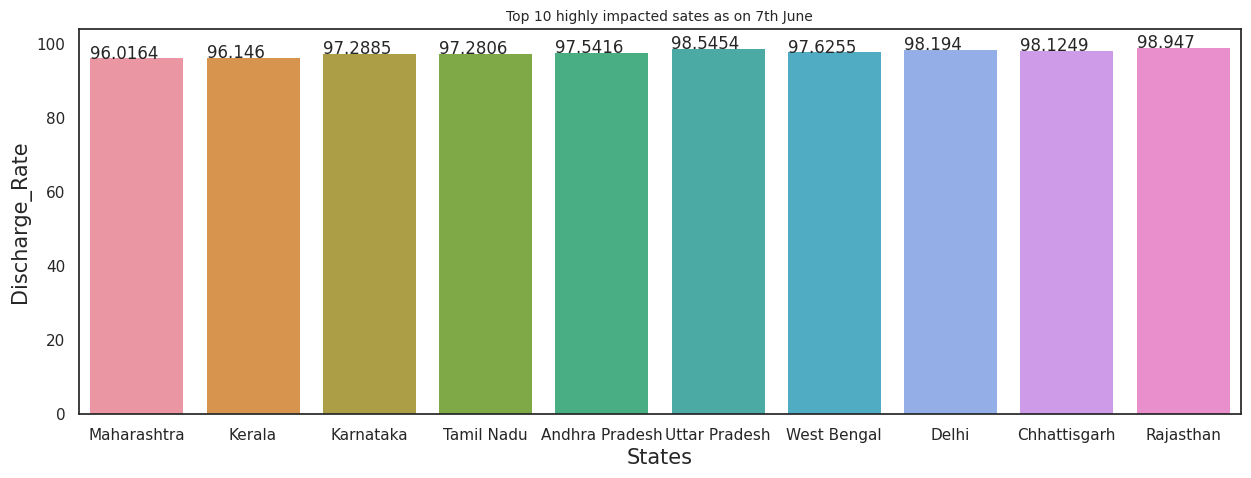

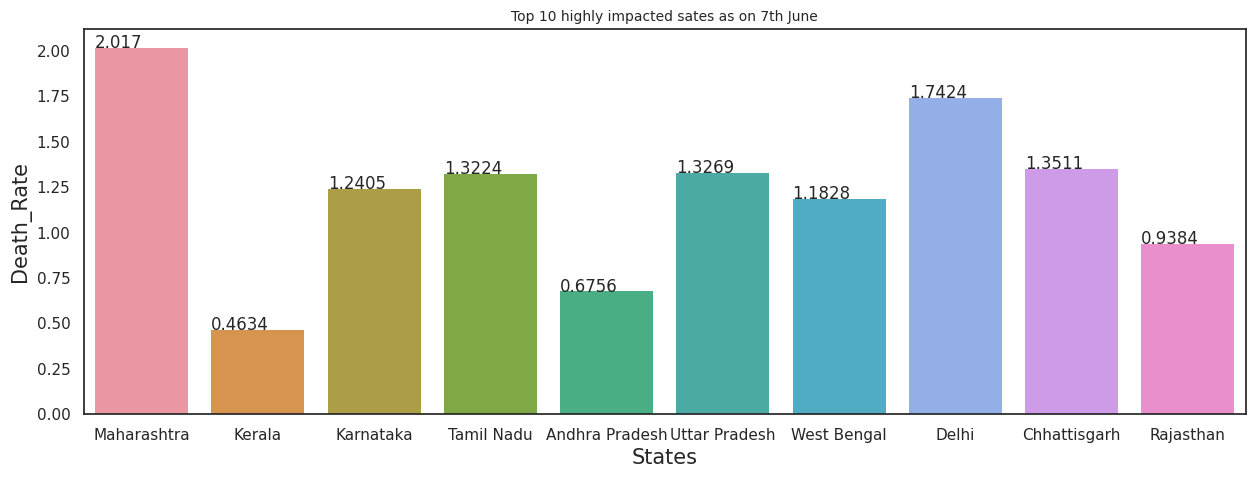

In [ ]:
for feature in top_cases[['Confirmed','Cured','Deaths','Active_cases','Discharge_Rate','Death_Rate']]:
    fig=plt.figure(figsize=(15,5))
    plt.title("Top 10 highly impacted sates as on 7th June", size=10)
    ax=sns.barplot(data=top_cases,y=top_cases[feature],x='States', linewidth=0, edgecolor='black')
    plt.xlabel('States', size = 15)
    plt.ylabel(feature, size = 15)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
plt.show()

In [ ]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra', 'Tamil Nadu', 'Andhra Pradesh', 'Uttar Pradesh']
mh=df[df['States']=='Maharashtra']
kl=df[df['States']=='Kerala']
ka=df[df['States']=='Karnataka']
tn=df[df['States']=='Tamil Nadu']
ap=df[df['States']=='Andhra Pradesh']
up=df[df['States']=='Uttar Pradesh']

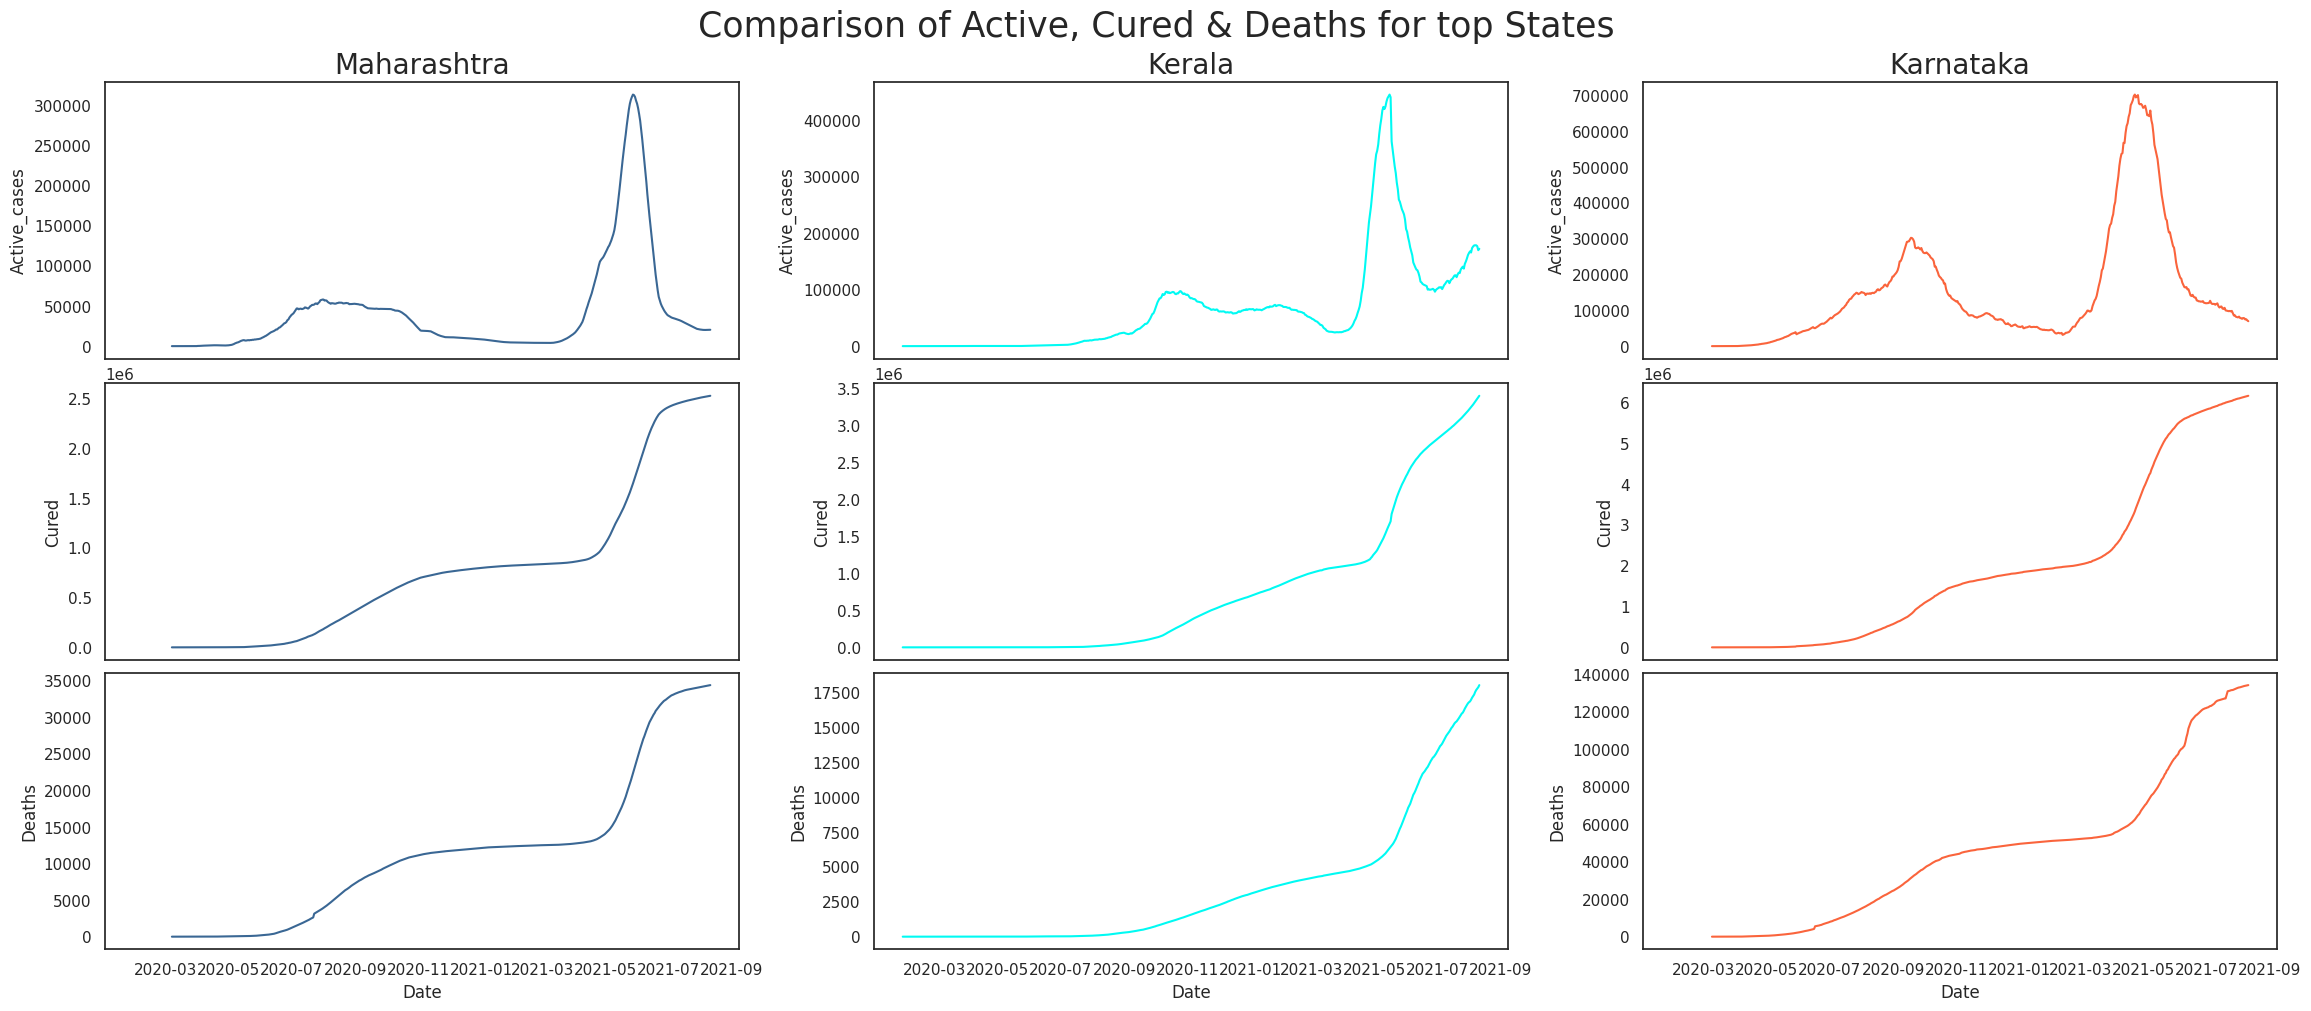

In [ ]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for top States", size = 25)
sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Maharashtra", size=20)
sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Kerala", size=20)
sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("Karnataka", size=20)
sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])
plt.show()


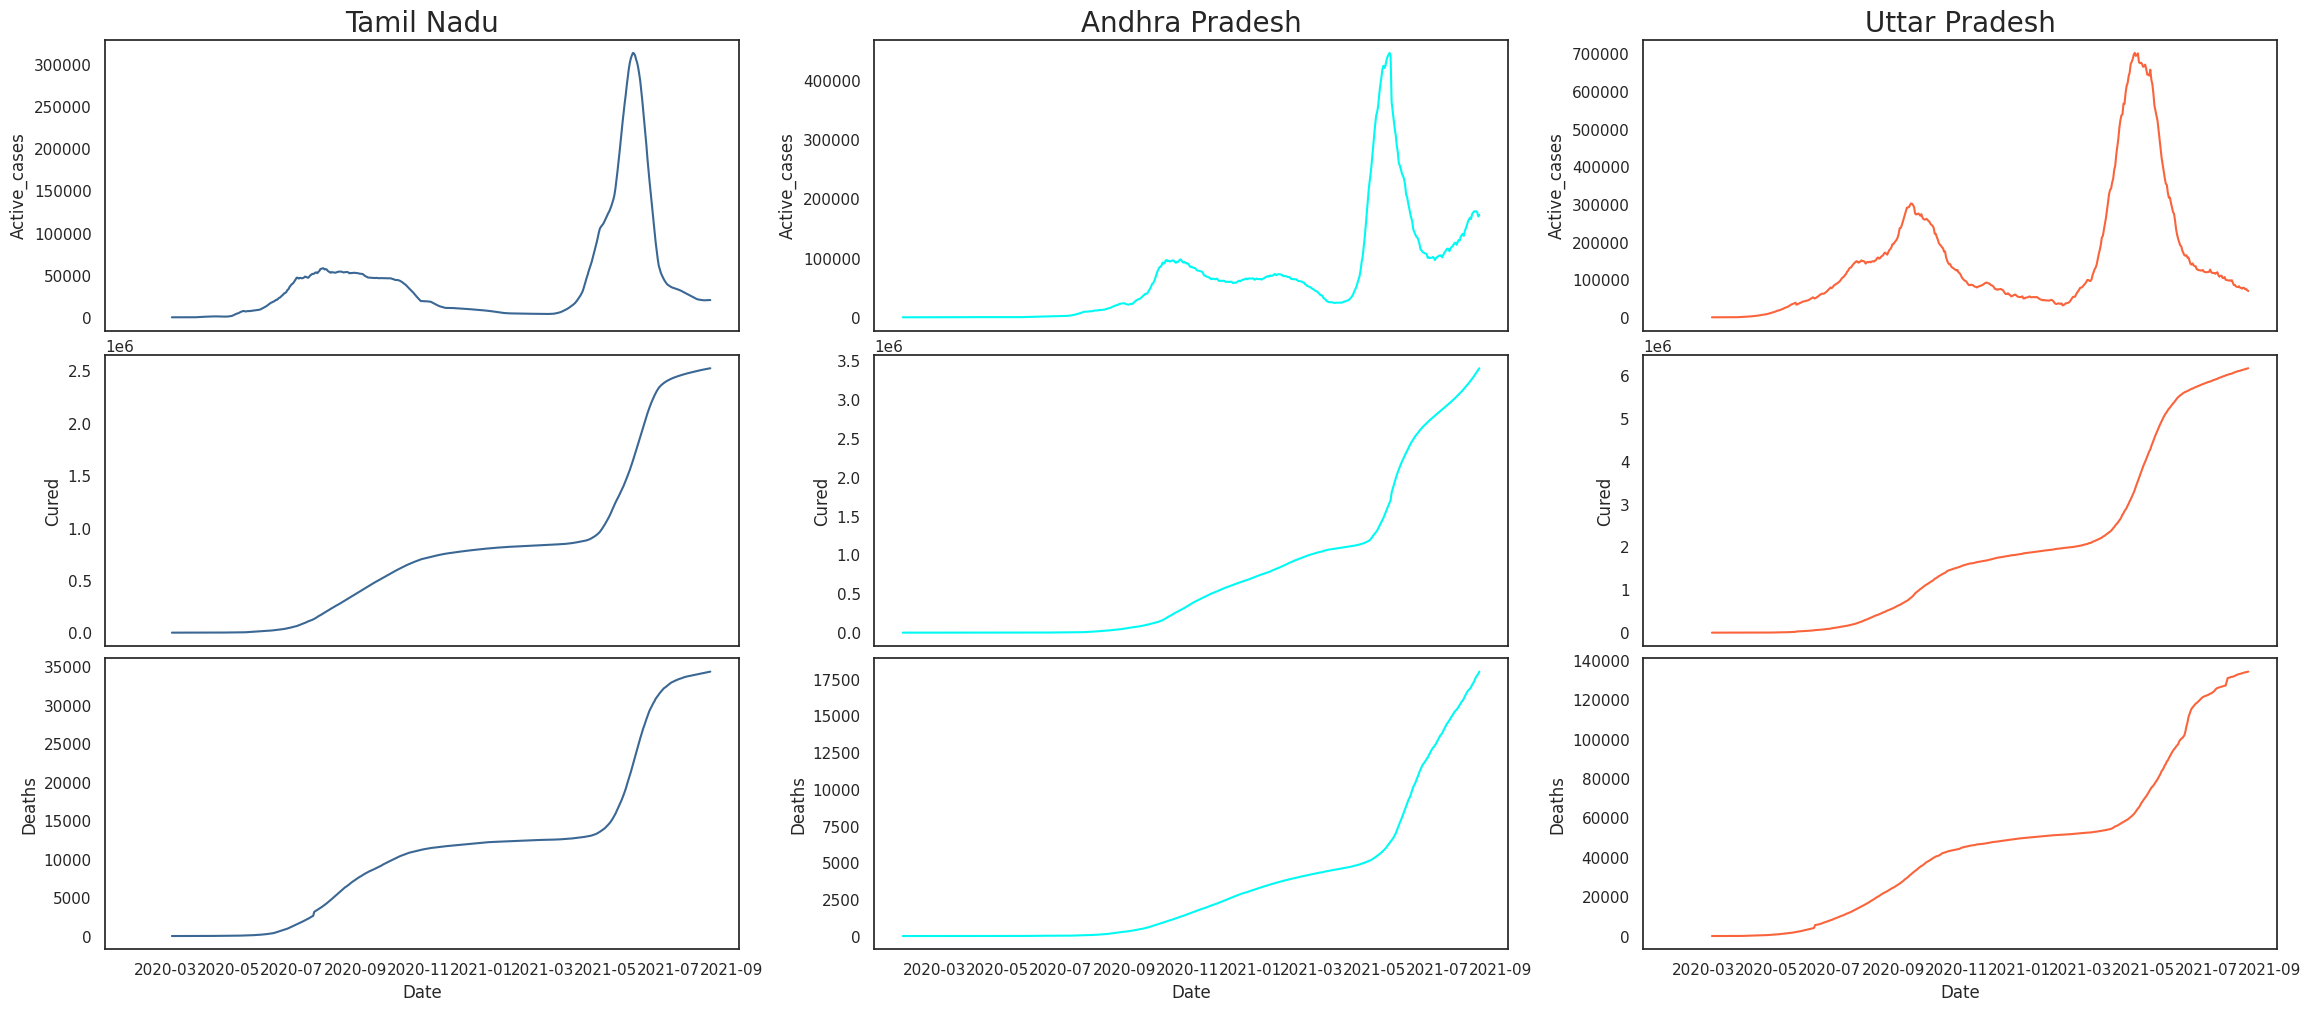

In [ ]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Tamil Nadu", size=20)
sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Andhra Pradesh", size=20)
sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("Uttar Pradesh", size=20)
sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])
plt.show()

In [ ]:
df['Date']= pd.to_datetime(df['Date'])          # Date is converted to DateTime format.
data_20 = df[df['Date'].dt.year==2020]               # Considering data of only the year 2020.
data_21 = df[df['Date'].dt.year==2021]               # Considering data of only the year 2021.

data_20['Month']=data_20['Date'].dt.month                    # Month is accessed from the DateTime object.
data_21['Month']=data_21['Date'].dt.month

#Year 2020
data_confirm_20= data_20['Confirmed'].groupby(data_20['Month']).sum()
data_dis_20= data_20['Cured'].groupby(data_20['Month']).sum()      # creating instances for 'confirmed','deaths','discharged' by month column
data_death_20= data_20['Deaths'].groupby(data_20['Month']).sum()

#Year 2021
data_confirm_21= data_21['Confirmed'].groupby(data_21['Month']).sum()
data_dis_21= data_21['Cured'].groupby(data_21['Month']).sum()      # creating instances for 'confirmed','deaths','discharged' by month column
data_death_21= data_21['Deaths'].groupby(data_21['Month']).sum()

cols_20=[data_confirm_20,data_dis_20,data_death_20]
data_20=pd.concat(cols_20,axis=1)

cols_21=[data_confirm_21,data_dis_21,data_death_21]
data_21=pd.concat(cols_21,axis=1)

#Year 2020
data_20['discharge_rate_20'] = np.round((data_20['Cured']/data_20['Confirmed'])*100, decimals=4)      # create instances for 'death_rate and discharge_rate'
data_20['death_rate_20'] = np.round((data_20['Deaths']/data_20['Confirmed'])*100, decimals=4)

#Year 2020
data_21['discharge_rate_21'] = np.round((data_21['Cured']/data_21['Confirmed'])*100, decimals=4)      # create instances for 'death_rate and discharge_rate'
data_21['death_rate_21'] = np.round((data_21['Deaths']/data_21['Confirmed'])*100, decimals=4)

<ipython-input-31-2927442a1d3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20['Month']=data_20['Date'].dt.month                    # Month is accessed from the DateTime object.
<ipython-input-31-2927442a1d3f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_21['Month']=data_21['Date'].dt.month


In [ ]:
data_20.reset_index(inplace=True)
data_20.head()

,Month,Confirmed,Cured,Deaths,discharge_rate_20,death_rate_20
0,1,2,0,0,0.0000,0.0000
1,2,86,0,0,0.0000,0.0000
2,3,9687,808,202,8.3411,2.0853
3,4,422442,75443,13270,17.8588,3.1413
4,5,2938234,1133341,89834,38.5722,3.0574


In [ ]:
data_21.reset_index(inplace=True)
data_21.head()

,Month,Confirmed,Cured,Deaths,discharge_rate_21,death_rate_21
0,1,326469747,315332019,4709167,96.5884,1.4425
1,2,305631803,297133802,4359434,97.2195,1.4264
2,3,356305616,342610397,4935253,96.1563,1.3851
3,4,440660671,384990190,5340298,87.3666,1.2119
4,5,751927486,645106765,8390917,85.7937,1.1159


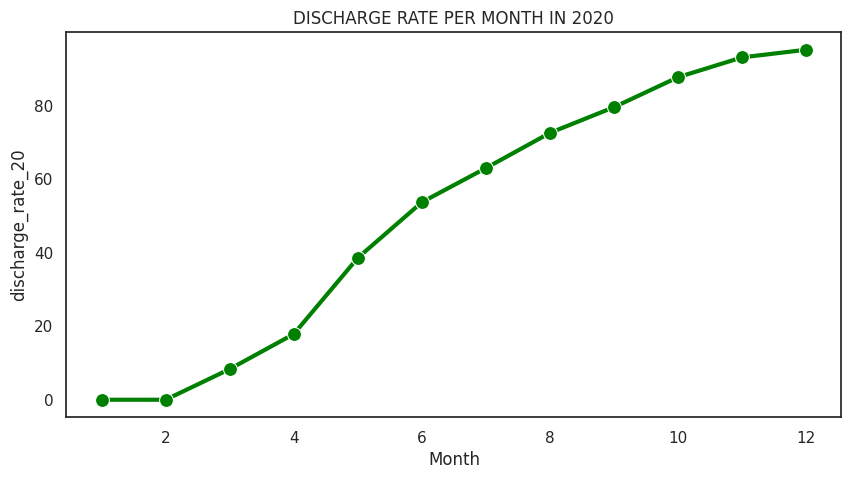

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_20",data=data_20,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2020')
plt.show()

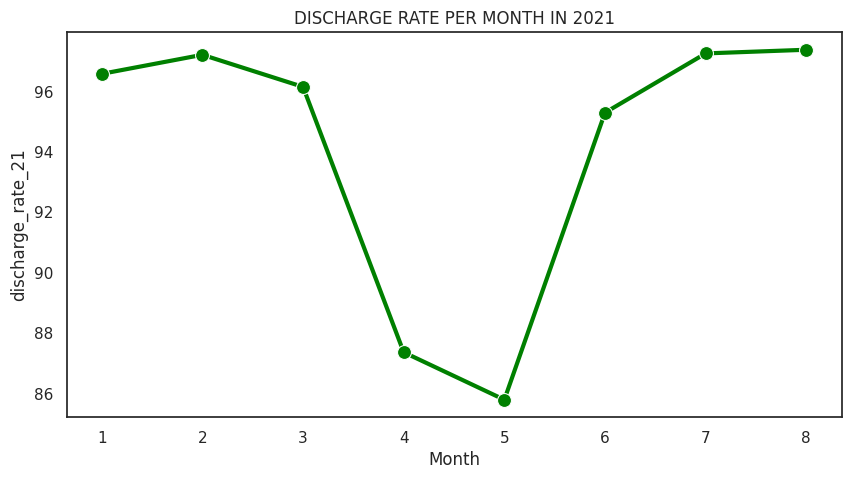

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_21",data=data_21,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2021')
plt.show()

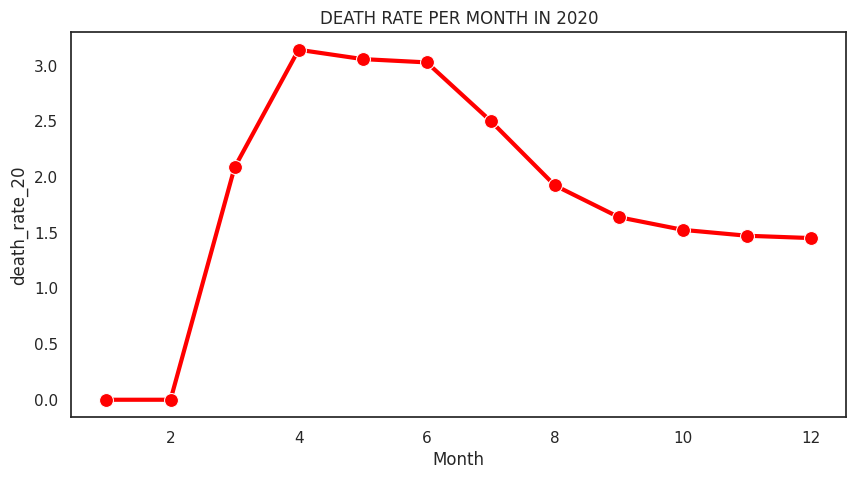

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_20",data=data_20,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2020')
plt.show()

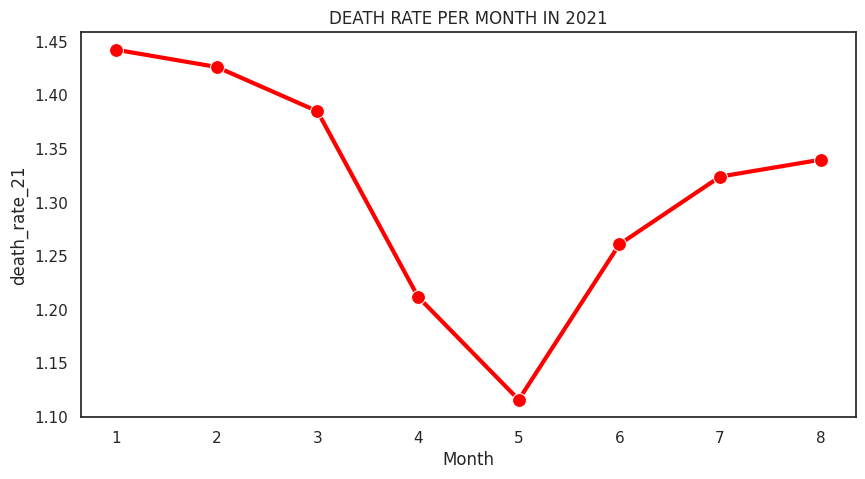

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_21",data=data_21,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2021')
plt.show()

In [ ]:
tn=df[df['States']=='Tamil Nadu']['Cured']
mh=df[df['States']=='Maharashtra']['Cured']
kl=df[df['States']=='Kerala']['Cured']

In [ ]:
df.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
0,1,2020-01-30,Kerala,1,0,0,0,1,1,0.0,0.0
1,2,2020-01-31,Kerala,1,0,0,0,1,1,0.0,0.0
2,3,2020-02-01,Kerala,2,0,0,0,2,2,0.0,0.0
3,4,2020-02-02,Kerala,3,0,0,0,3,3,0.0,0.0
4,5,2020-02-03,Kerala,3,0,0,0,3,3,0.0,0.0


In [ ]:
print('Total number of Active Covid-19 cases across India : {}'.format(max_confirmed_cases['Active_cases'].sum()))
top_cases = max_confirmed_cases.groupby('States')['Active_cases'].max().sort_values(ascending=False).to_frame()
top_cases.style.background_gradient(cmap='flare')

Total number of Active Covid-19 cases across India : 464357


,Active_cases
States,
Maharashtra,120061
Kerala,101097
Karnataka,42019
Tamil Nadu,34926
Andhra Pradesh,33964
Odisha,26347
Assam,23590
West Bengal,17950
Telangana,11704


In [ ]:
from prophet import Prophet
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
recovered = df.groupby('Date').sum()['Cured'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
confirmed.head()

<ipython-input-41-7555679ca868>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
<ipython-input-41-7555679ca868>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  recovered = df.groupby('Date').sum()['Cured'].reset_index()
<ipython-input-41-7555679ca868>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deaths = df.groupby('Date').sum()['Deaths'].reset_index()

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [ ]:
confirmed.columns = ['ds', 'y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)       #Making future prediction for next 7 days
future.tail(10)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0rysroj/mnz3jiht.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0rysroj/q6kjehhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20966', 'data', 'file=/tmp/tmpv0rysroj/mnz3jiht.json', 'init=/tmp/tmpv0rysroj/q6kjehhj.json', 'output', 'file=/tmp/tmpv0rysroj/prophet_modelrioj0lw2/prophet_model-20231005093539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:35:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:35:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
557,2021-08-09
558,2021-08-10
559,2021-08-11
560,2021-08-12
561,2021-08-13
562,2021-08-14
563,2021-08-15
564,2021-08-16
565,2021-08-17
566,2021-08-18


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
562,2021-08-14,3.657705e+07,3.396662e+07,3.901190e+07
563,2021-08-15,3.673535e+07,3.411989e+07,3.930205e+07
564,2021-08-16,3.689096e+07,3.451644e+07,3.929517e+07
565,2021-08-17,3.703032e+07,3.436741e+07,3.958479e+07
566,2021-08-18,3.711715e+07,3.478002e+07,3.979579e+07


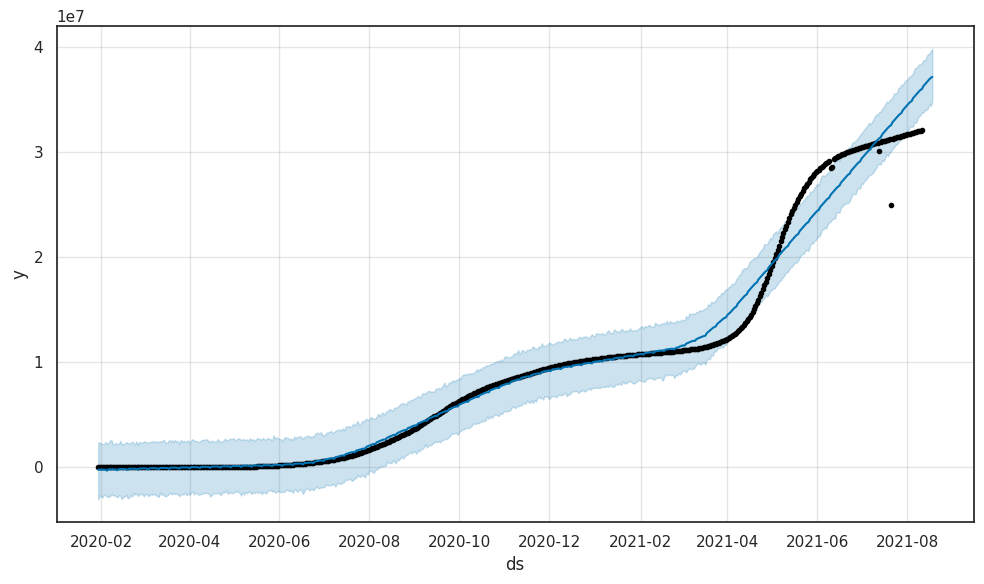

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

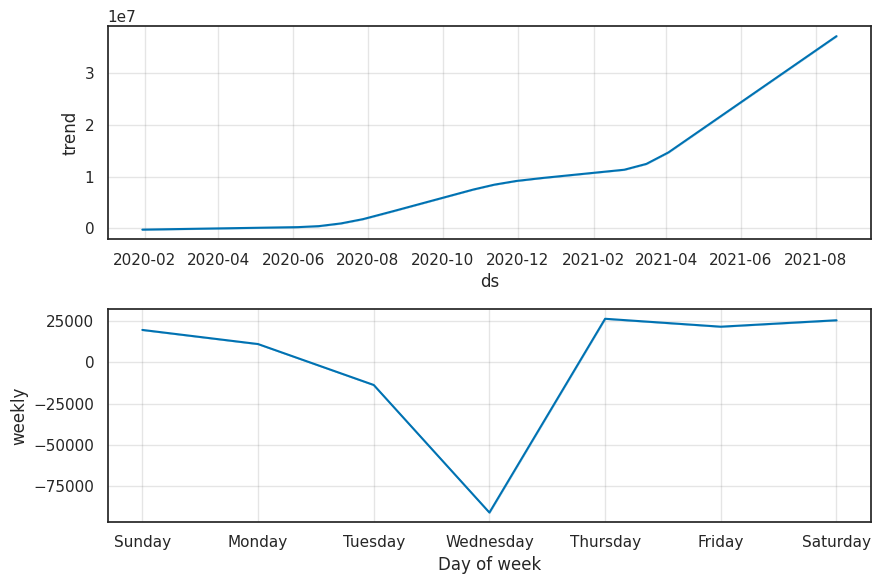

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast)

In [ ]:
print('Average recovery rate Covid-19 cases across India : {}'.format(max_confirmed_cases['Discharge_Rate'].mean()))
top_cases = max_confirmed_cases.groupby('States')['Discharge_Rate'].max().sort_values(ascending=False).to_frame()
top_cases.style.background_gradient(cmap='flare')

Average recovery rate Covid-19 cases across India : 96.15198055555555


,Discharge_Rate
States,
Dadra and Nagar Haveli and Daman and Diu,99.631000
Rajasthan,98.947000
Madhya Pradesh,98.799900
Haryana,98.620300
Uttar Pradesh,98.545400
Chandigarh,98.501800
Gujarat,98.494500
Bihar,98.490000
Jharkhand,98.345000


In [ ]:
discharge_rate = df[['Date','Discharge_Rate']]
discharge_rate.head()

,Date,Discharge_Rate
0,2020-01-30,0.0
1,2020-01-31,0.0
2,2020-02-01,0.0
3,2020-02-02,0.0
4,2020-02-03,0.0


In [ ]:
discharge_rate.columns = ['ds', 'y']
discharge_rate['ds'] = pd.to_datetime(discharge_rate['ds'])

<ipython-input-49-902f21db0ab1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharge_rate['ds'] = pd.to_datetime(discharge_rate['ds'])


In [ ]:
m = Prophet(interval_width=0.50)
m.fit(discharge_rate)
future = m.make_future_dataframe(periods=7)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0rysroj/akvbn9ic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0rysroj/j65gmzag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47456', 'data', 'file=/tmp/tmpv0rysroj/akvbn9ic.json', 'init=/tmp/tmpv0rysroj/j65gmzag.json', 'output', 'file=/tmp/tmpv0rysroj/prophet_modelkek5g5f7/prophet_model-20231005093542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:35:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:35:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
562,2021-08-14,99.843797,90.724434,108.146213
563,2021-08-15,100.121146,91.532404,108.018317
564,2021-08-16,100.283518,91.649514,108.562905
565,2021-08-17,100.489436,91.697491,109.778658
566,2021-08-18,100.583903,92.200506,109.388607


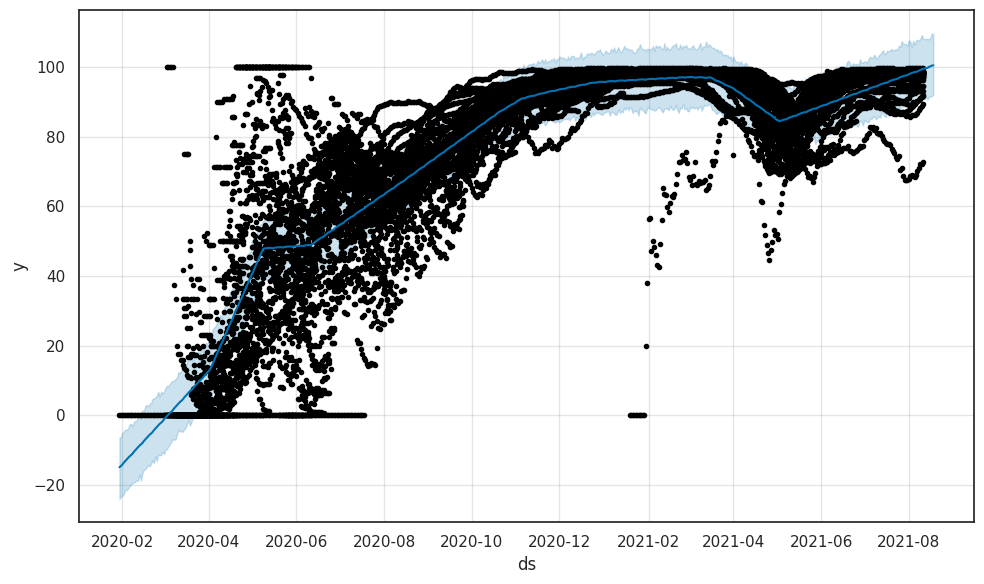

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

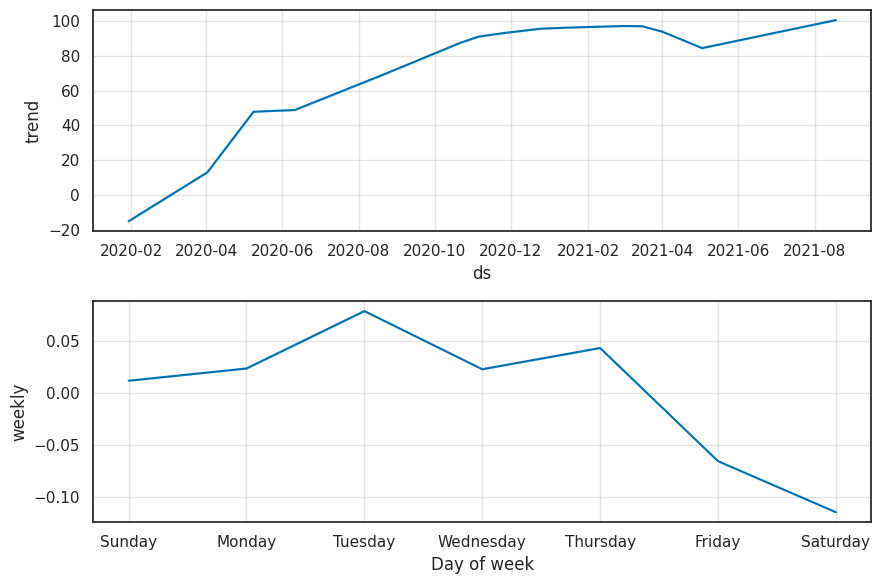

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast)

In [ ]:
print('Average recovery rate Covid-19 cases across India : {}'.format(max_confirmed_cases['Discharge_Rate'].mean()))
top_cases = max_confirmed_cases.groupby('States')['Death_Rate'].max().sort_values(ascending=False).to_frame()
top_cases.style.background_gradient(cmap='flare')

Average recovery rate Covid-19 cases across India : 96.15198055555555


,Death_Rate
States,
Punjab,2.702500
Uttarakhand,2.152300
Maharashtra,2.017000
Nagaland,1.952300
Goa,1.835100
Delhi,1.742400
Himachal Pradesh,1.717900
Andaman and Nicobar Islands,1.710800
Meghalaya,1.678200


In [ ]:
discharge_rate = df[['Date','Death_Rate']]
discharge_rate.head()

,Date,Death_Rate
0,2020-01-30,0.0
1,2020-01-31,0.0
2,2020-02-01,0.0
3,2020-02-02,0.0
4,2020-02-03,0.0


In [ ]:
discharge_rate.columns = ['ds', 'y']
discharge_rate['ds'] = pd.to_datetime(discharge_rate['ds'])

<ipython-input-56-902f21db0ab1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharge_rate['ds'] = pd.to_datetime(discharge_rate['ds'])


In [ ]:
m = Prophet(interval_width=0.50)
m.fit(discharge_rate)
future = m.make_future_dataframe(periods=7)       #Making future prediction for next 7 days
future.tail(10)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0rysroj/c579tq_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0rysroj/aa1_4yug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95826', 'data', 'file=/tmp/tmpv0rysroj/c579tq_t.json', 'init=/tmp/tmpv0rysroj/aa1_4yug.json', 'output', 'file=/tmp/tmpv0rysroj/prophet_modelurn0aeha/prophet_model-20231005093550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:35:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:35:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
557,2021-08-09
558,2021-08-10
559,2021-08-11
560,2021-08-12
561,2021-08-13
562,2021-08-14
563,2021-08-15
564,2021-08-16
565,2021-08-17
566,2021-08-18


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
562,2021-08-14,1.312348,0.185380,2.420426
563,2021-08-15,1.330682,0.310171,2.418693
564,2021-08-16,1.321643,0.248795,2.262409
565,2021-08-17,1.329841,0.349674,2.363405
566,2021-08-18,1.332233,0.271190,2.442473


In [ ]:
df.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
0,1,2020-01-30,Kerala,1,0,0,0,1,1,0.0,0.0
1,2,2020-01-31,Kerala,1,0,0,0,1,1,0.0,0.0
2,3,2020-02-01,Kerala,2,0,0,0,2,2,0.0,0.0
3,4,2020-02-02,Kerala,3,0,0,0,3,3,0.0,0.0
4,5,2020-02-03,Kerala,3,0,0,0,3,3,0.0,0.0


In [ ]:
state_cases = max_confirmed_cases.drop(['Sno','Date','ConfirmedIndianNational',
                                       'ConfirmedForeignNational'],axis=1)

state_wise_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Oranges',subset=["Active_cases"])\
                        .background_gradient(cmap='RdYlBu',subset=["Death_Rate"])\
                        .background_gradient(cmap='Accent',subset=["Discharge_Rate"])

state_wise_cases

,States,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
16798,Maharashtra,5861720,123136,6104917,120061,96.016400,2.017000
16794,Kerala,2866806,13818,2981721,101097,96.146000,0.463400
16793,Karnataka,2779038,35434,2856491,42019,97.288500,1.240500
16808,Tamil Nadu,2432017,33059,2500002,34926,97.280600,1.322400
16779,Andhra Pradesh,1858189,12870,1905023,33964,97.541600,0.675600
16812,Uttar Pradesh,1681912,22646,1706739,2181,98.545400,1.326900
16813,West Bengal,1470512,17817,1506279,17950,97.625500,1.182800
16786,Delhi,1408699,24997,1434608,912,98.194000,1.742400
16784,Chhattisgarh,977360,13457,996037,5220,98.124900,1.351100
16806,Rajasthan,942756,8941,952789,1092,98.947000,0.938400


In [ ]:
vaccine_df = pd.read_csv('/content/covid_vaccine_statewise.csv')

In [ ]:
print(vaccine_df.columns)

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', 'Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-45 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-45 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')


In [ ]:
vacc_df=vaccine_df.copy()
vaccine_df = vaccine_df[['Updated On', 'State', 'Total Doses Administered', 'Sessions',
        'First Dose Administered', 'Second Dose Administered',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       '18-45 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated']]
vaccine_df.columns = ['Date','States','Total_Doses_Administered','Total_Sessions_Conducted','First_Dose_Administered','Second_Dose_Administered','Male_Vaccinated','Female_Vaccinated','Transgender_Vaccinated','Total_CoviShield_Administered','Total_SputnikV_Administered','18-45_Years','45-60_Years','60+_Years','Total_Individuals_Vaccinated']
vaccine_df.head()

,Date,States,Total_Doses_Administered,Total_Sessions_Conducted,First_Dose_Administered,Second_Dose_Administered,Male_Vaccinated,Female_Vaccinated,Transgender_Vaccinated,Total_CoviShield_Administered,Total_SputnikV_Administered,18-45_Years,45-60_Years,60+_Years,Total_Individuals_Vaccinated
0,16-01-2021,India,48276.0,3455.0,48276.0,0.0,47697.0,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17-01-2021,India,58604.0,8532.0,58604.0,0.0,57969.0,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18-01-2021,India,99449.0,13611.0,99449.0,0.0,98150.0,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19-01-2021,India,195525.0,17855.0,195525.0,0.0,192508.0,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20-01-2021,India,251280.0,25472.0,251280.0,0.0,247334.0,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
vaccine_df.isnull().sum()

Date                                0
States                              0
Total_Doses_Administered          224
Total_Sessions_Conducted          224
First_Dose_Administered           224
Second_Dose_Administered          224
Male_Vaccinated                   224
Female_Vaccinated                4850
Transgender_Vaccinated           4112
Total_CoviShield_Administered    4111
Total_SputnikV_Administered      4111
18-45_Years                      7685
45-60_Years                      7685
60+_Years                        7685
Total_Individuals_Vaccinated     1926
dtype: int64

In [ ]:
vaccine_df = vaccine_df[vaccine_df['Total_Individuals_Vaccinated'].notna()]

In [ ]:
vaccine_df['Date'] = pd.to_datetime(vaccine_df['Date'], format = '%d-%m-%Y')
latest_date = max(vaccine_df['Date'])
print("Current Date : ", latest_date)

Current Date :  2021-06-24 00:00:00


In [ ]:
vaccine_df[vaccine_df['States'] == "Dadra and Nagar Haveli and Daman and Diu"]

,Date,States,Total_Doses_Administered,Total_Sessions_Conducted,First_Dose_Administered,Second_Dose_Administered,Male_Vaccinated,Female_Vaccinated,Transgender_Vaccinated,Total_CoviShield_Administered,Total_SputnikV_Administered,18-45_Years,45-60_Years,60+_Years,Total_Individuals_Vaccinated
1696,2021-01-16,Dadra and Nagar Haveli and Daman and Diu,23.0,4.0,23.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
1697,2021-01-17,Dadra and Nagar Haveli and Daman and Diu,23.0,4.0,23.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
1698,2021-01-18,Dadra and Nagar Haveli and Daman and Diu,15.0,6.0,15.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
1699,2021-01-19,Dadra and Nagar Haveli and Daman and Diu,31.0,6.0,31.0,0.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0
1700,2021-01-20,Dadra and Nagar Haveli and Daman and Diu,31.0,8.0,31.0,0.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,2021-06-19,Dadra and Nagar Haveli and Daman and Diu,308375.0,25304.0,281451.0,26924.0,308363.0,0.0,198255.0,61295.0,21703.0,NaN,NaN,NaN,281451.0
1852,2021-06-21,Dadra and Nagar Haveli and Daman and Diu,317267.0,23225.0,290224.0,27043.0,317255.0,0.0,206126.0,62108.0,21789.0,NaN,NaN,NaN,290224.0
1853,2021-06-22,Dadra and Nagar Haveli and Daman and Diu,325006.0,23175.0,297701.0,27305.0,324994.0,0.0,212772.0,62822.0,21896.0,NaN,NaN,NaN,297701.0
1854,2021-06-23,Dadra and Nagar Haveli and Daman and Diu,332131.0,23897.0,304552.0,27579.0,332119.0,0.0,218778.0,63494.0,22058.0,NaN,NaN,NaN,304552.0


<ipython-input-121-ee13d8d6f42c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0,20,40,60,80,100,120])


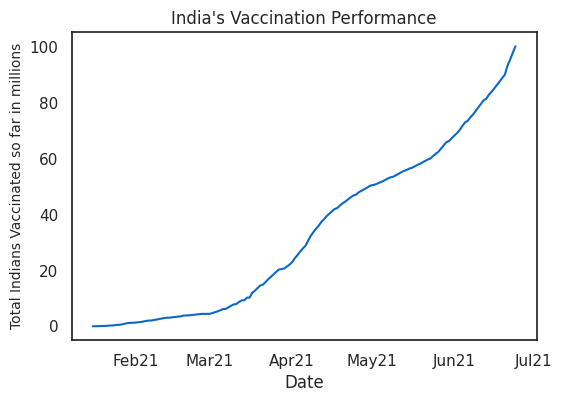

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, dpi=100, figsize=(6,4))

sns.lineplot(data=vaccine_df[vaccine_df['States']=='India'], x='Date', y='Total_Individuals_Vaccinated', ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter('%b%y'))
ax.set_ylabel('Total Indians Vaccinated so far in millions', fontsize=10)
ax.set_yticklabels([0,0,20,40,60,80,100,120])

Xstart, Xend = ax.get_xlim()
plt.title('India\'s Vaccination Performance')
plt.show()